<a href="https://colab.research.google.com/github/Francottio22/E-commerce-ML-Model/blob/main/Copia_de_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from google.colab import drive


In [ ]:
file_path = drive.mount('/content/drive/Ecommerce')

data = pd.read_csv(file_path)

In [ ]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


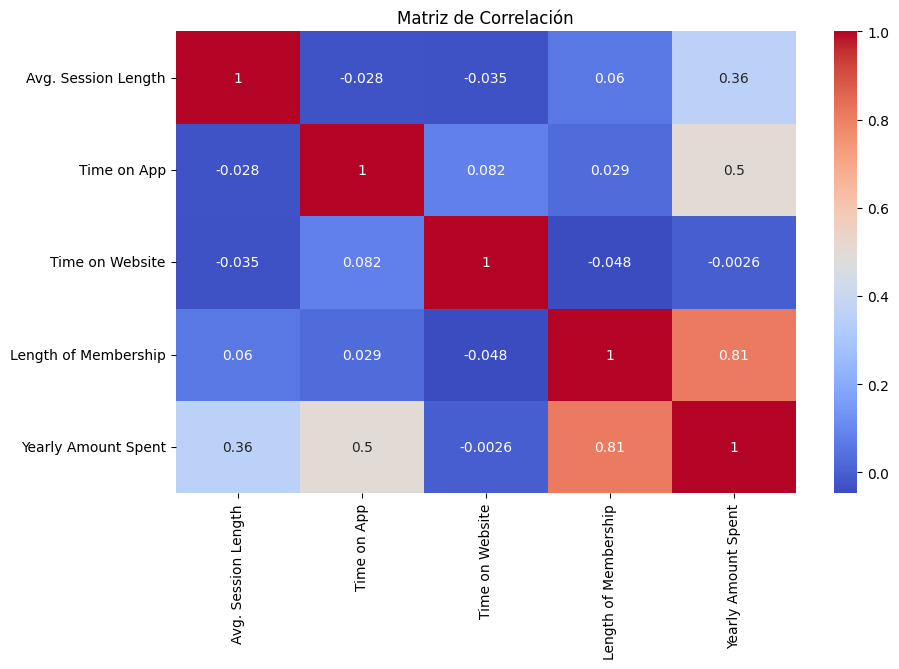

In [ ]:
# Seleccionar las columnas relevantes manualmente
selected_columns = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

# Calcular la matriz de correlación
correlation_matrix_selected = selected_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()




In [ ]:
# Extraer la correlación de las variables independientes con la variable dependiente 'Yearly Amount Spent'
correlation_with_target_selected = correlation_matrix_selected["Yearly Amount Spent"].sort_values(ascending=False)
print(correlation_with_target_selected)


Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar las variables independientes
independent_vars = selected_columns[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
scaler = StandardScaler()
independent_vars_scaled = scaler.fit_transform(independent_vars)
independent_vars_scaled = pd.DataFrame(data=independent_vars_scaled, columns=independent_vars.columns)
independent_vars_scaled['Yearly Amount Spent'] = selected_columns['Yearly Amount Spent']
print(independent_vars_scaled.head())


   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.456351     0.607280         2.493589              0.550107   
1            -1.136502    -0.949464         0.206556             -0.870927   
2            -0.052723    -0.727139         0.049681              0.572067   
3             1.263010     1.676390        -0.335978             -0.413996   
4             0.279838     0.747770         0.471737              0.914422   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


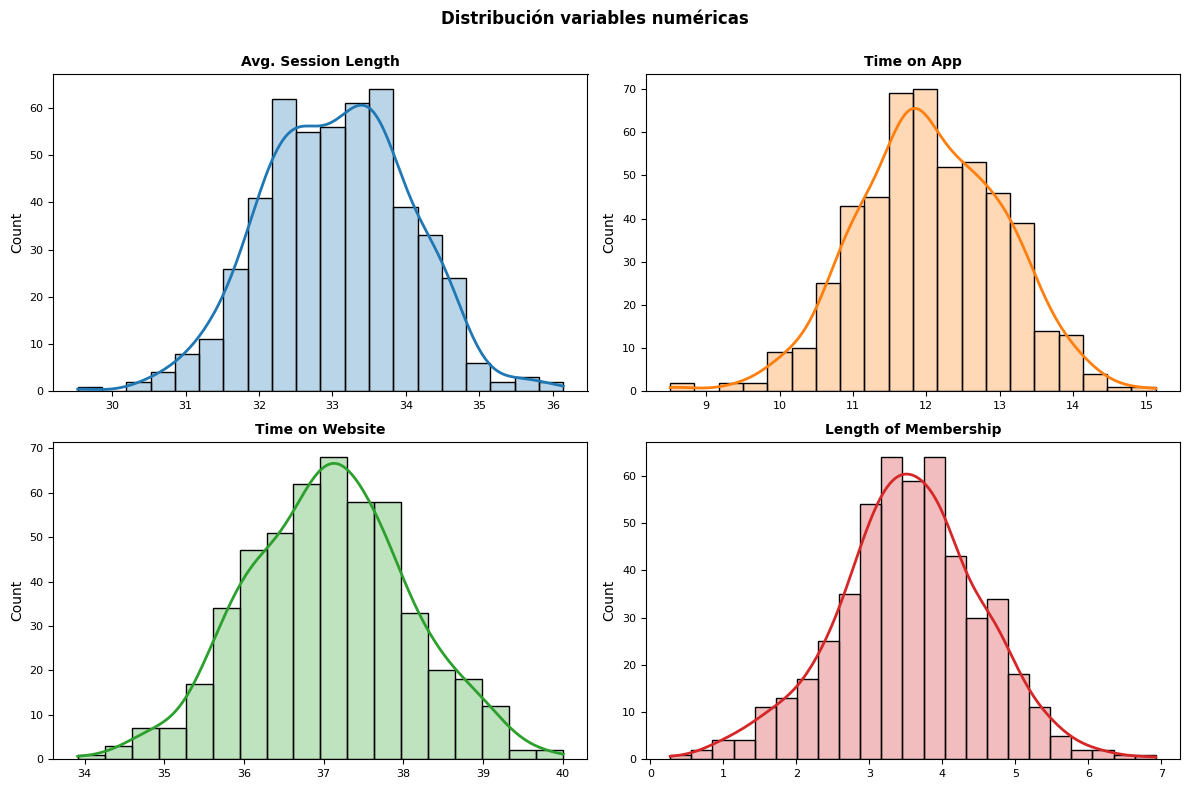

In [ ]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flat
columnas_numeric = selected_columns.columns[:-1]  # Excluyendo 'Yearly Amount Spent'

for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(column, fontsize=10, fontweight='bold')
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=12, fontweight='bold')
plt.show()


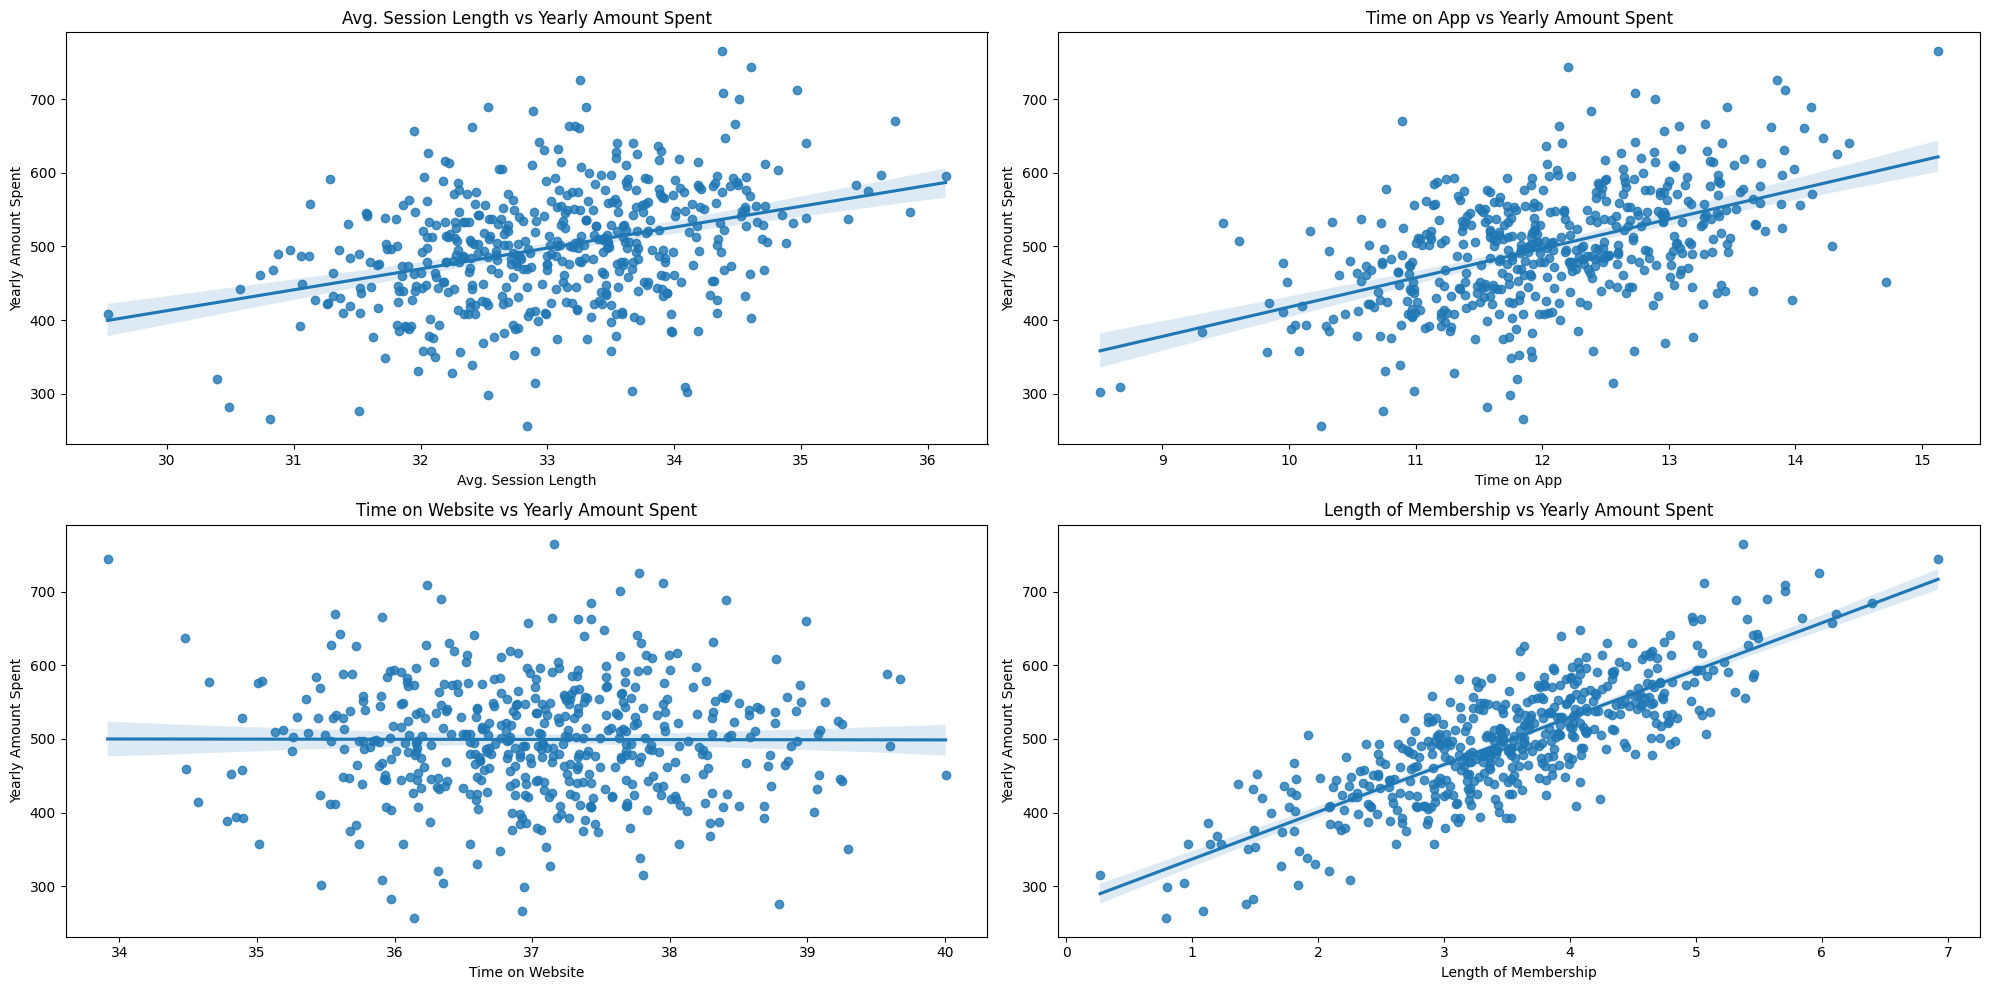

In [ ]:
# Gráficos de regresión entre variables independientes y la variable dependiente
plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.regplot(x=data['Avg. Session Length'], y=data['Yearly Amount Spent'], data=data)
plt.title('Avg. Session Length vs Yearly Amount Spent')

plt.subplot(222)
sns.regplot(x=data['Time on App'], y=data['Yearly Amount Spent'], data=data)
plt.title('Time on App vs Yearly Amount Spent')

plt.subplot(223)
sns.regplot(x=data['Time on Website'], y=data['Yearly Amount Spent'], data=data)
plt.title('Time on Website vs Yearly Amount Spent')

plt.subplot(224)
sns.regplot(x=data['Length of Membership'], y=data['Yearly Amount Spent'], data=data)
plt.title('Length of Membership vs Yearly Amount Spent')

plt.tight_layout()
plt.show()


In [ ]:

# División de datos en train y test
X = independent_vars_scaled[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = independent_vars_scaled['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1234, shuffle=True)

# Añadir la constante para el modelo de Statsmodels
X_train_sm = sm.add_constant(X_train, prepend=True)
X_test_sm = sm.add_constant(X_test, prepend=True)

# Entrenar el modelo de OLS
modelo = sm.OLS(endog=y_train, exog=X_train_sm)
modelo = modelo.fit()
print(modelo.summary())


                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     1525.
Date:                 Sun, 09 Jun 2024   Prob (F-statistic):           3.12e-85
Time:                         08:29:05   Log-Likelihood:                -371.91
No. Observations:                  100   AIC:                             753.8
Df Residuals:                       95   BIC:                             766.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [ ]:
# Realizar predicciones
predicciones = modelo.predict(exog=X_test_sm)

# Evaluar el modelo
mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')


MAE: 8.324568683062587
MSE: 109.0948464396649
R^2: 0.982474130209539


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

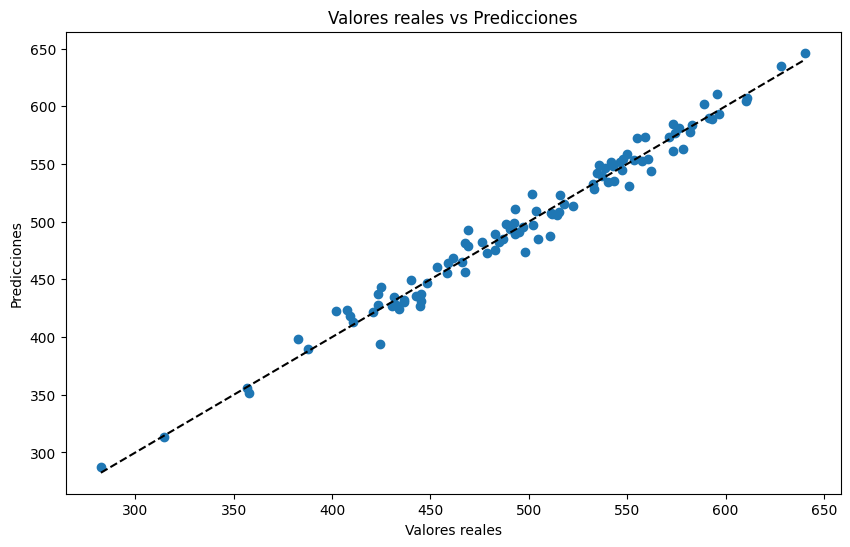

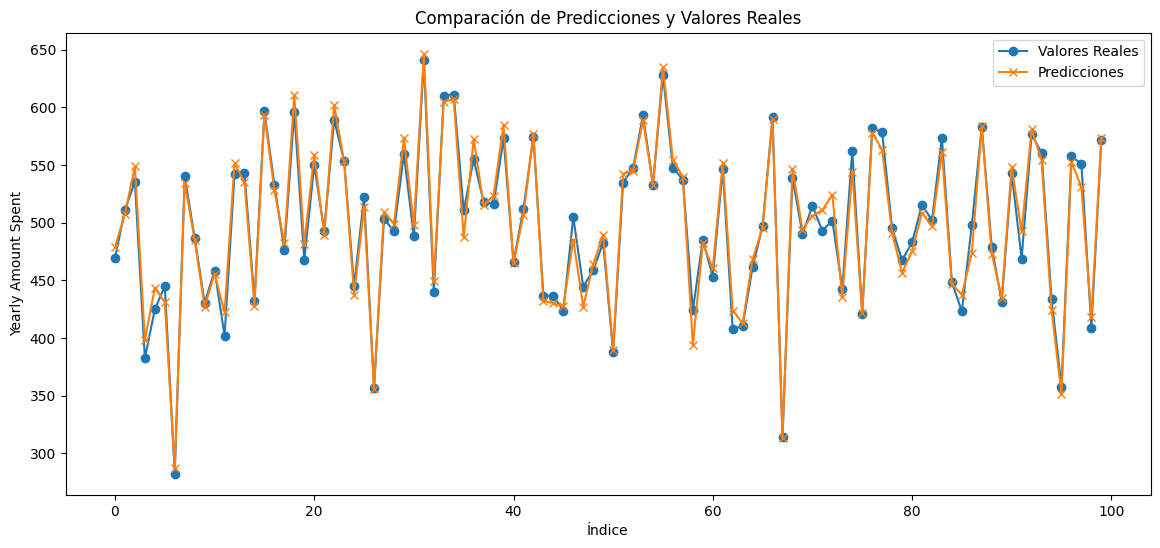

In [ ]:
# Crear un gráfico de dispersión para comparar las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.show()

# Crear un gráfico de líneas para comparar las predicciones y los valores reales
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Valores Reales', marker='o')
plt.plot(range(len(y_test)), predicciones, label='Predicciones', marker='x')
plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()
